<center> 
    <font face="Baskerville Old Face">
        <font size="6"> <h1> Uno strumento di analisi statistica delle prove d'esame di programmazione</h1> </font>
        <font size="3"> <h2> Progetto di tesi triennale in informatica - Università statale di Milano</h2> </font>          
        <font size="3"> <h3> Marco Cordoni </h3> </font>     
    </font>
</center>

In [1]:
# importo le funzioni definite nel file IrtFunctions.r
source("IrtFunctions.r")

Warning message:
"package 'readxl' was built under R version 3.4.2"Warning message:
"package 'ltm' was built under R version 3.4.2"Loading required package: MASS
Loading required package: msm
Loading required package: polycor


<center> 
    <font face="Baskerville Old Face">
        <font size="3"> <h2> Esempio di uso di stimatori e confronto grafico per le difficoltà</h2> </font>          
    </font>
</center>

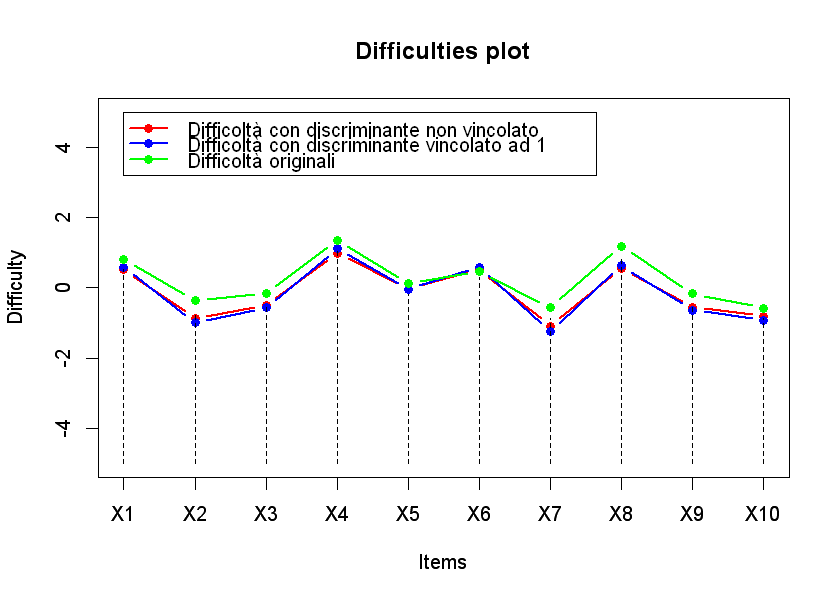

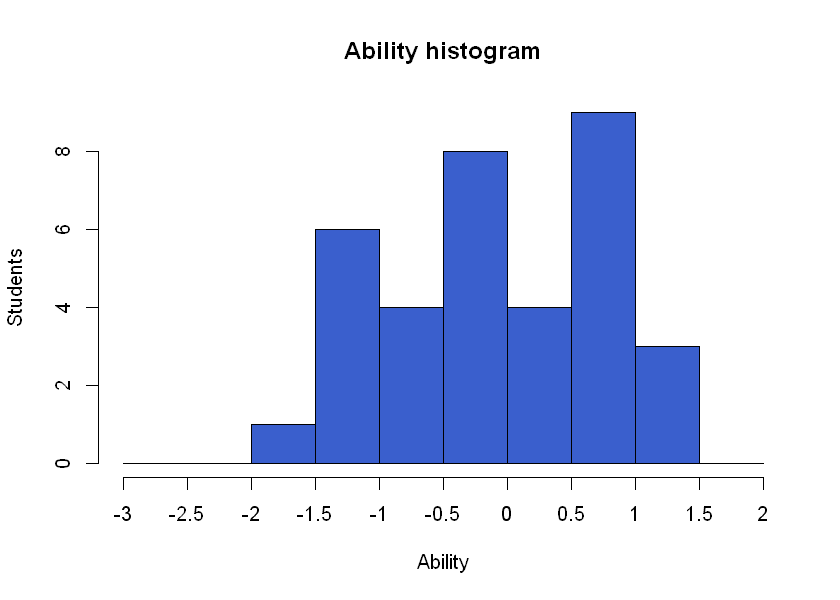

In [2]:
# Modifico la dimensione dei grafici
width <- 7
height <- 5
sizePlot(width, height)

# Definisco il numero di items, il numero di studenti ed quante estrazioni effettuare rispetto al numero di studenti
numItems <- 10
numStudents <- 35 
bootStrapVal <- 15

# Genero randomicamente difficolà e abilità
diff <- rnorm(numItems)
abil <- rnorm(numStudents)

# Genero i dati
datiDichot <- generateDichot(diff, abil)

# Bootstrapping
numExtractions <- bootStrapVal * numStudents
bottDatiDichot <- bootstrapping(datiDichot, numExtractions)

# Stimo le difficoltà con entrambi i metodi
difficDichotF <- estimateDifficultiesDichotFreeDiscrim(bottDatiDichot)
difficDichotO <- estimateDifficultiesDichotOneDiscrim(bottDatiDichot)

# Visualizzo e confronto i grafici relativi alle difficoltà stimate con entrambi i metodi e le difficoltà iniziali
plotDifficultiesDichot(datiDichot, difficDichotF)
par(new = TRUE)
plotDifficultiesDichot(datiDichot, difficDichotO, color = "blue")
par(new = TRUE)
plotDifficultiesDichot(datiDichot, diff, color = "green")
legend(1, 10, legend=c("Difficoltà con discriminante non vincolato", "Difficoltà con discriminante vincolato ad 1", "Difficoltà originali"), col=c("red", "blue", "green"), lty=1, cex=1, lwd=2, pch=16)

# Stimo le abilità e visualizzo il relativo grafico
abil <- estimateAbilitiesDichot(datiDichot)
plotAbilitiesDichot(abil, start = -3, end = 2, by = 0.5)

<center> <font size="10" face="Baskerville Old Face"> One-parameter logistic (1PL) </font> </center> 
<br>
<font size="5">
    \begin{equation} 
    p(x_j = 1 | \theta_i, \beta_j) = \frac{\mathrm{e}^{(\theta_i - \beta_j)}}
                                      {1 + \mathrm{e}^{(\theta_i - \beta_j)}}
    \end{equation}
</font>
<br>

In [3]:
# Calcolo la tabella di probabilità che ogni studente risponda correttamente ad ogni test usando il discriminante non vincolato
dfProb <- calcProbabilites(items = datiDichot, diff = difficDichotF, abil = abil)

# Visualizzo la tabella più semplicemente
showProbabilities(df = dfProb)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
35 %,69 %,60 %,26 %,49 %,35 %,73 %,34 %,62 %,67 %
23 %,54 %,45 %,16 %,34 %,23 %,60 %,22 %,46 %,53 %
13 %,37 %,29 %,8 %,20 %,13 %,43 %,12 %,30 %,36 %
9 %,28 %,21 %,6 %,14 %,9 %,33 %,8 %,22 %,27 %
59 %,85 %,80 %,47 %,71 %,59 %,87 %,58 %,81 %,84 %
67 %,89 %,85 %,57 %,78 %,67 %,91 %,66 %,86 %,88 %
35 %,69 %,60 %,26 %,49 %,35 %,73 %,34 %,62 %,67 %
23 %,54 %,45 %,16 %,34 %,23 %,60 %,22 %,46 %,53 %
43 %,75 %,67 %,32 %,56 %,43 %,79 %,42 %,69 %,73 %
50 %,80 %,74 %,39 %,64 %,50 %,83 %,50 %,75 %,79 %


<center> 
    <font face="Baskerville Old Face">
        <font size="3"> <h2> Gestione dei dati assenti (NA)</h2> </font>          
    </font>
</center>

In [4]:
# Definisco la probabilità di rimpiazzare gli 0 con NA
prob <- 0.2

# Applico il rimpiazzamento dei valori 0 in NA e il bootsrapping
datiDichotNA <- replaceRandomZeroWithNA(datiDichot, prob)
datiDichotNABoot <- bootstrapping(datiDichotNA, numStudents * bootStrapVal)

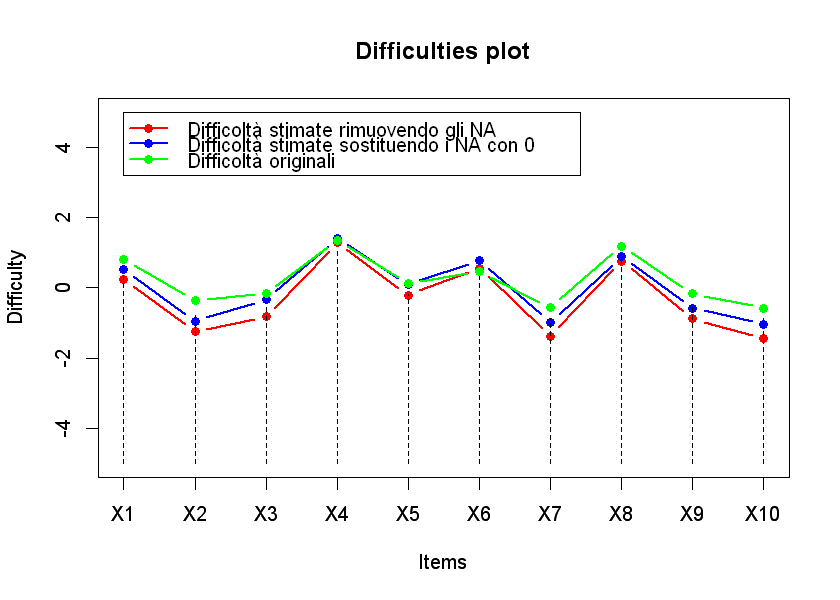

In [5]:
# Eseguo la stima rimuovendo gli NA prima della computazione
estDiffNULL <- estimateDifficultiesDichotOneDiscrim(datiDichotNABoot, forNA = NULL)

# Eseguo la stima sostituendo gli NA con 0 
estDiffZero <- estimateDifficultiesDichotOneDiscrim(replaceNaWithZero(datiDichotNABoot))

# Confronto i grafici relativi alle difficoltà stimate nei 2 modi con i valori reali
plotDifficultiesDichot(datiDichot, estDiffNULL)
par(new = TRUE)
plotDifficultiesDichot(datiDichot, estDiffZero, color = "blue")
par(new = TRUE)
plotDifficultiesDichot(datiDichot, diff, color = "green")
legend(1, 10, legend=c("Difficoltà stimate rimuovendo gli NA", "Difficoltà stimate sostituendo i NA con 0", "Difficoltà originali"), col=c("red", "blue", "green"), lty=1, cex=1, lwd=2, pch=16)

In [9]:
#' Produce una matrice dicotomica definendo la condizione per cui un esercizio viene definito come passato(1) oppure no(0)
#' @param session Sessione considerata
#' @param vote Stringa che indica come valutare gli esercizi
#' @param maxError Se scelto il criterio "errors", questo campo indica il massimo numero di errori commettibili
#' @param percTestCaseOk Se scelto il criterio "testCase", questo campo indica la percentuale di test case che devono 
#' essere corretti rispetto al totale
#' @param keepNA Paramatreo booleano per indicare se indicare con NA i voti in cui gli studenti non hanno raggiunto la votazione
#' precedente al paramentro di valutazione indicato (es. evaluateSource(session, vote = "compiles", keepNA = TRUE), i voti
#' NA riguarderanno gli studenti che non hanno raggiunto lo step precedente, cioè l'upload)
#' @return Data frame dicotomico, possiede una riga per studente e una colonna per esercizio, nelle intersezioni vi sono i 
#' risultati delle valutazioni sulla base delle specifiche inserite
#' @examples
#' sourceData <- "data.R"      
#' source(sourceData)
#' numSessions <- 5
#' session <- sessions[numSessions]
#' vote <- "testCase"
#' p <- 0.5
#' evaluateSource(session, vote, percTestCaseOk = p)             
evaluateSource <- function(session, vote, maxError, percTestCaseOk, keepNA = FALSE) {      
    results <- get(paste("results_", session, sep = ""))
    
    if(vote == "uploaded")
        results[,,vote]
    else if(vote == "compiles"){
        dfC <- results[,,vote]
        dfU <- results[,,"uploaded"]
        
        if(keepNA)
            dfC[dfU == 0] <- NA   
        dfC
    }
    else if(vote == "errors"){
        df <- results[,,vote]
        df[df <= maxError] <- 1 
        df[df > maxError] <- 0
        
        if(!keepNA)
            df[is.na(df)] <- 0            
        df
    }
    else if(vote == "testCase"){
        cases <- get(paste("cases_", session, sep = ""))
        df <- results[,,"oks"]
        df <- t((t(df)) / c(cases)) 
        df[df >= percTestCaseOk] <- 1
        df[df < percTestCaseOk] <- 0
        
        if(!keepNA)
            df[is.na(df)] <- 0     
        df
    }        
}

In [10]:
sourceData <- "data.R"
source(sourceData)
bootstrapVal <- 10

<font face="Baskerville Old Face">
    <font size="5"> 
    
Di seguito andrò ad analizzare i risultati delle sessioni. <br><br>

Per tale analisi ho scelto di considerate un esercizio superato solo se passa almeno il 50% dei test case ad esso associati, ho fatto questa assunzione perchè in esame non sono ritenuti generalmente corretti gli esercizi solo perchè è stato effettuato il loro upload, compilano o semplicemente perchè non presentano errori di esecuzione.<br><br>

In ogni tabella dicotomica provvederò ad eliminare le colonne totalmente uniformi o quasi al fine di permettere la convergenza dell'algoritmo di stima.
    </font>
</font>

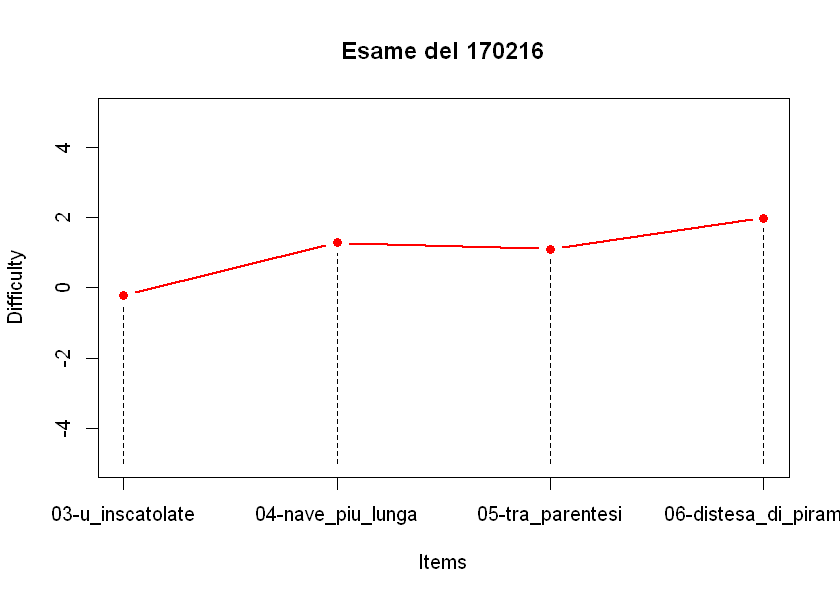

In [11]:
numSessions <- 2
session <- sessions[numSessions]
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)
nStud <- nrow(evalWithTestCase)

evalWithTestCase <- evalWithTestCase[,c(3:6)]

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))
plotDifficultiesDichot(evalWithTestCase, diffTestCase, name = paste("Esame del",session))

<font face="Baskerville Old Face">
    <font size="5"> 
Possiamo notare un andamento crescente delle difficoltà, potremmo presuppore che il professore assegni gli esercizi in esame mostrando prima quelli più semplici e veloci da superare e lasciando per ultimi quelli che richiedo più tempo e impegno.
    </font>
</font>

In [41]:
numSessions <- 6 
session <- sessions[numSessions]

evalWithUpload   <- evaluateSource(session, vote = "uploaded")
evalWithCompiles <- evaluateSource(session, vote = "compiles")
evalWithErrors   <- evaluateSource(session, vote = "errors", maxError = 2)
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)

diffUpload   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithUpload,   n = bootstrapVal * nStud))
diffCompiles <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithCompiles, n = bootstrapVal * nStud))
diffErrors   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithErrors,   n = bootstrapVal * nStud))
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

<font face="Baskerville Old Face">
    <font size="5"> 
Visualizzo e confronto i grafici relativi alle difficoltà stimate tenendo conto: se è stato effettuato l'upload, se compila, se sono stati commessi meno di 2 errori di esecuzione e se almeno il 50% dei test case sono corretti
    </font>
</font>

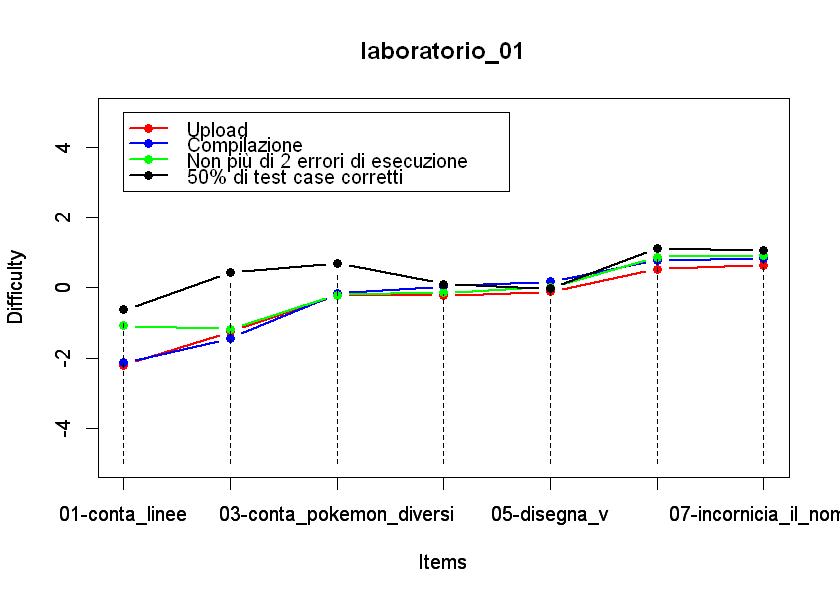

In [42]:
plotDifficultiesDichot(evalWithUpload, diffUpload, color = "red", name = session)
par(new = TRUE)
plotDifficultiesDichot(evalWithCompiles, diffCompiles, color = "blue", name = "")
par(new = TRUE)
plotDifficultiesDichot(evalWithErrors, diffErrors, color = "green", name = "")
par(new = TRUE)
plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = "")
legend(1, 10, legend=c("Upload", "Compilazione", "Non più di 2 errori di esecuzione", "50% di test case corretti"), col=c("red", "blue", "green", "black"), lty=1, cex=1, lwd=2, pch=16)

<font face="Baskerville Old Face">
    <font size="4"> 
L'elevato numero di studenti (46) permette di avere una buona fiducia nei dati ottenuti<br><br>

Dal grafico si possono trarre diverse conclusioni: 
<ul>
   <li>Le stime legate all'upload, compilazione ed errori in esecuzione coincidono quasi sempre, da ciò deduciamo che gli 
       studenti che consegnano gli esercizi lo fanno solo nel caso compilino e abbiano pochi errori di esecuzione o nessuno</li>
   <li>Le difficoltà hanno un andamento crescente, quindi il professore potrebbe aver assegnato gli esercizi considerando
       che gli studenti avrebbero dovuto impegnarsi maggiormente negli ultimi</li>
   <li>Nella fase iniziale la stima per test case si discosta abbastanza dalle altre, sovrapponendosi ad essi successivamente,
       questo potrebbe essere indicativo del fatto che gli studenti all'inizio erano meno abili, forse a causa di spiegazioni 
       poco chiare da parte del professore</li>
</ul>
    </font>
</font>

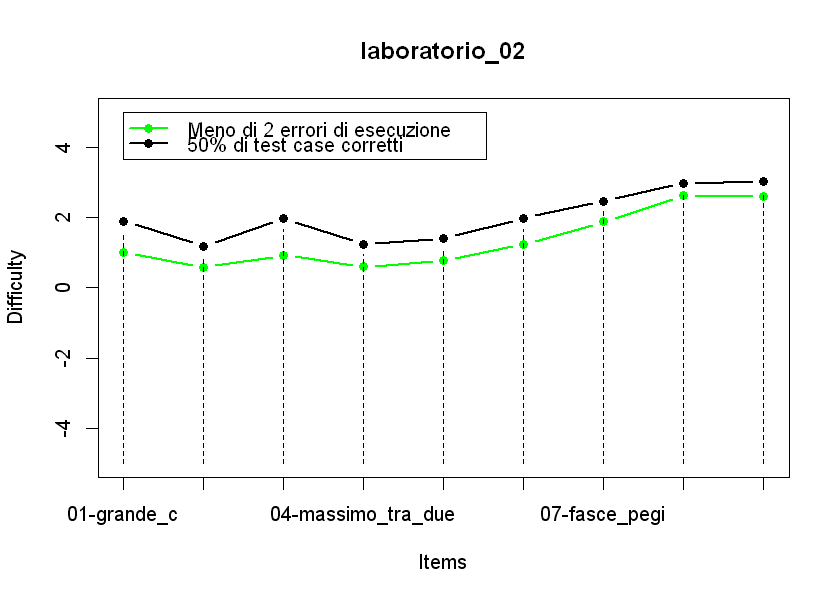

In [13]:
numSessions <- 7
session <- sessions[numSessions]

evalWithErrors   <- evaluateSource(session, vote = "errors", maxError = 2)
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)

nStud <- nrow(evalWithTestCase)

diffErrors   <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithErrors,   n = bootstrapVal * nStud))
diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithErrors, diffErrors, color = "green", name = session)
par(new = TRUE)
plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = "")
legend(1, 10, legend=c("Meno di 2 errori di esecuzione", "50% di test case corretti"), col=c("green", "black"), lty=1, cex=1, lwd=2, pch=16)

<font face="Baskerville Old Face">
    <font size="5"> 
Anche nel laboratorio 2 si può notare una sovrapposizione tra le stime considerando la presenza di meno di 2 errori di 
esecuzione e il raggiungimento di almeno il 50% di test case corretti ma a differenza del precedente grafico questo non ha un andamento particolarmente crescente, anzi, è quasi sempre fisso su una difficoltà medio-alta, da ciò possiamo dedurre che gli studenti hanno avuto particolari difficoltà in tutto gli esercizi, scontrandoci con l'ipotesi formulata al punto precedente sul crescente livello di difficoltà pensato dal professore all'interno dei laboratori
    </font>
</font>

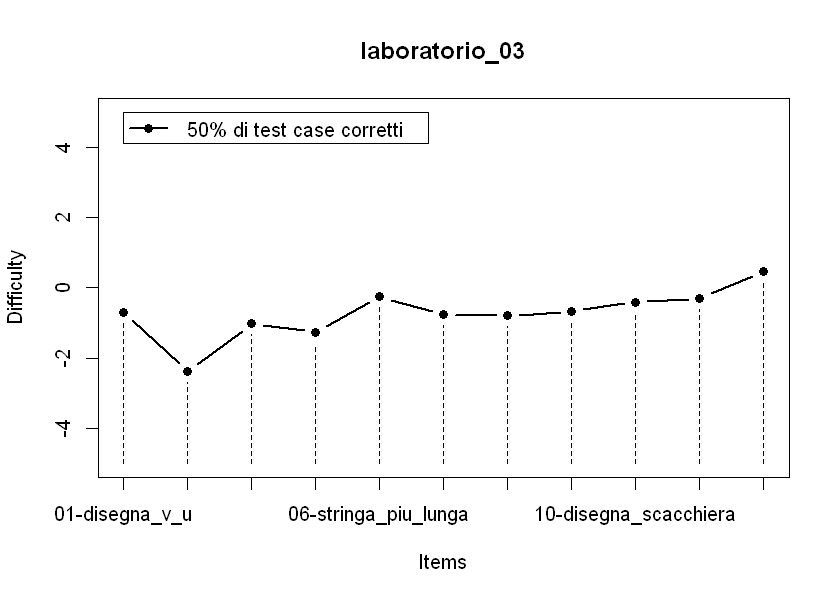

In [14]:
numSessions <- 8
session <- sessions[numSessions]
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)
nStud <- nrow(evalWithTestCase)

evalWithTestCase <- evalWithTestCase[,-c(5)]

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

<font face="Baskerville Old Face">
    <font size="5"> 
Nel laboratorio 3 notiamo che la difficoltà stimata si assesta per tutti gli esercizi su un livello medio-basso 
con una leggere crescita verso gli ultimi
    </font>
</font>

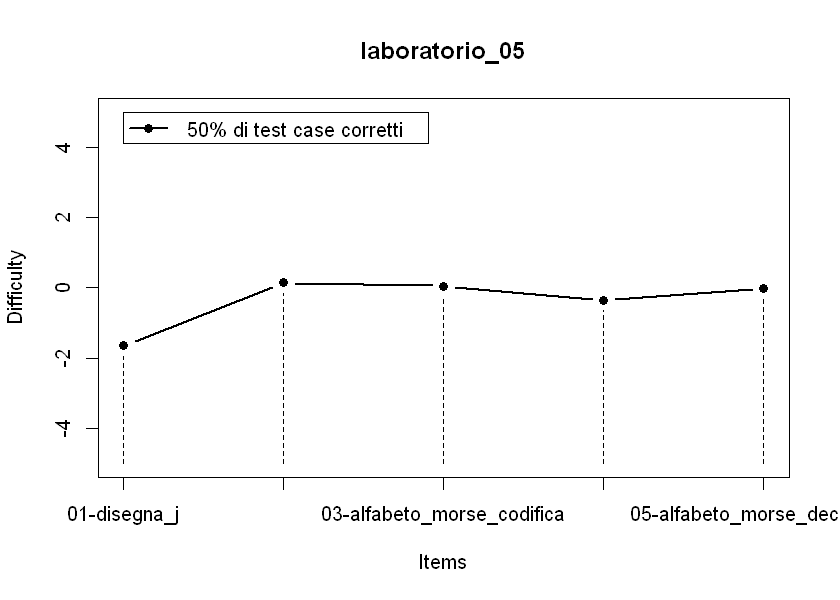

In [15]:
numSessions <- 10
session <- sessions[numSessions]
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)
nStud <- nrow(evalWithTestCase)

# Rimuovo la colonna 6 perchè a causa della scarsità di studentiche hanno passato i test l'algoritmo non convergerebbe
evalWithTestCase <- evalWithTestCase[,-c(6)]

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

<font face="Baskerville Old Face">
    <font size="5"> 
Nel laboratorio 5 notiamo che la difficoltà stimata ha un andamento costante per quasi tutti gli esercizi   
    </font>
</font>

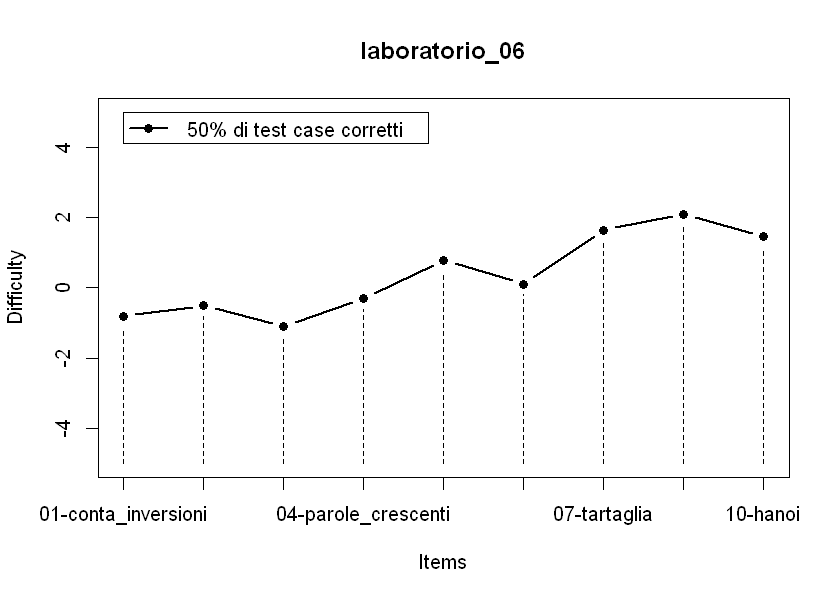

In [16]:
numSessions <- 11
session <- sessions[numSessions]
evalWithTestCase <- evaluateSource(session, vote = "testCase", percTestCaseOk = 0.5)
nStud <- nrow(evalWithTestCase)

evalWithTestCase <- evalWithTestCase[,-c(9,11)]

diffTestCase <- estimateDifficultiesDichotOneDiscrim(bootstrapping(evalWithTestCase, n = bootstrapVal * nStud))

plotDifficultiesDichot(evalWithTestCase, diffTestCase, color = "black", name = session)
legend(1, 10, legend=c("50% di test case corretti"), col=c("black"), lty=1, cex=1, lwd=2, pch=16)

<font face="Baskerville Old Face">
    <font size="5"> 
Nel laboratorio 6 notiamo che la difficoltà stimata ha un andamento crescente con qualche diminuzione ma non abbastanza significativa da negare l'esistenza di un aumento di difficoltà in relazione al numero dell'esercizio
    </font>
</font>